# Data Visualization with Pandas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Styling a Plot¶

Before we dive into data visualization in Pandas, it would be a good idea to get a quick introduction to Matplotlib's `style` module. Matplotlib comes with a number of predefined styles to customize the plots. These styles generally change the look of plots by changing color maps, line styles, backgrounds etc. Because Pandas is built on Matplotlib for visualizations, this will change the style of our Pandas graphs as we'll see below.

We can use `plt.style.available` to see a list of predefined styles available in Matplotlib.

In [7]:
plt.rcParams['figure.figsize'] = (10,10)
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Above, is a list of styles available.

In order to use a style, write `plt.style.use(<style_name>)`

Today, let's use `ggplot` and see how it changes the visualization

In [19]:
plt.style.use('ggplot')

Let's build a synthetic temporal DataFrame with the following steps:

- Data frame with three columns A, B, and C
- For data in each column, we will use a random number generator to generate 365 numbers (to reflect days in a year) using np.random.randn()
- Using NumPy's .cumsum() (cumulative sum) method, we will cumulatively sum the generated random numbers in each column
- Offset column B by +25 and column C by -25 with respect to Column A, which will remain unchanged
- Using pd.date_range(), set the index to be every day in 2018 (starting from 1st of January)

We'll also set a seed for controlling the randomization, allowing us to reproduce the data. *We'll also set a seed for controlling the randomization, allowing us to reproduce the data.*

In [20]:
np.random.seed(777)

data = pd.DataFrame({'A':np.random.randn(365).cumsum(),
                    'B':np.random.randn(365).cumsum() + 25,
                    'C':np.random.randn(365).cumsum() - 25}, 
                     index = pd.date_range('1/1/2018', periods = 365))
data.head()

,A,B,C
2018-01-01,-0.468209,25.435990,-22.997943
2018-01-02,-1.291034,26.479220,-22.673404
2018-01-03,-1.356414,25.832356,-21.669027
2018-01-04,-2.069776,26.456703,-21.408310
2018-01-05,-1.163425,25.864281,-22.685208


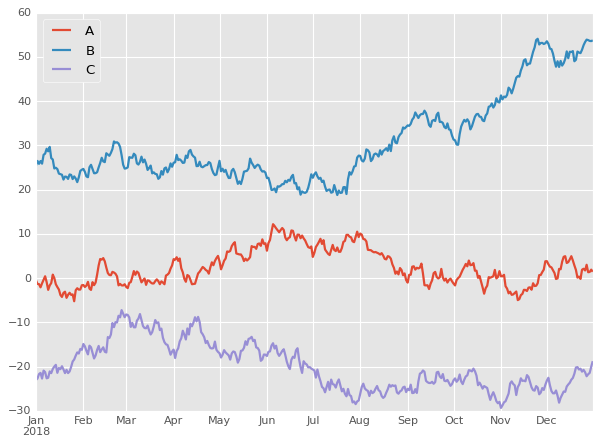

In [21]:
data.plot();

The `DataFrame.plot()` method is just a simple wrapper around `plt.plot()` that draws line plots. So when we call `data.plot()`, we get a line graph of all the columns in the data frame with labels. 

The `DataFrame.plot()` method allows us to plot a number of different kinds of plots. We can select which plot we want to use by specifying the `kind` parameter.

- ‘line’ : line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot
- ‘hexbin’ : hexbin plot

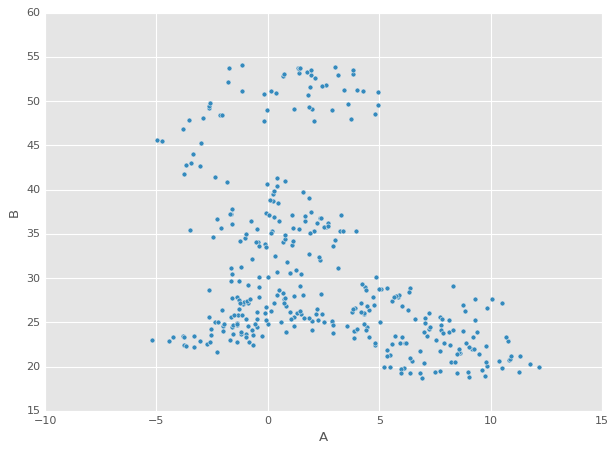

In [28]:
# Scatter plot of A and B
# The semicolon mutes any extra output
data.plot('A','B', kind = 'scatter');

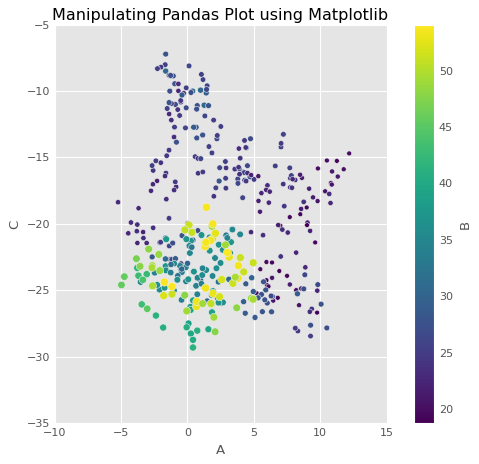

In [36]:
# This also works
ax = data.plot.scatter('A', 'C',
                       c = 'B',
                       s = data['B'],
                       colormap = "viridis")
# Use a scatter plot
# Cols: A and C
# c - set color
# s -size of data points based on the value of data['B']
# colormap - color palette
ax.set_aspect('equal') 
# Controls the aspect ratio of the plot
ax.set_title("Manipulating Pandas Plot using Matplotlib");
# Setting the figure title

Here, A and C columns plotted against one another with graduating color and changing the size and based on the values of the 'B' column.

**Other Plots**

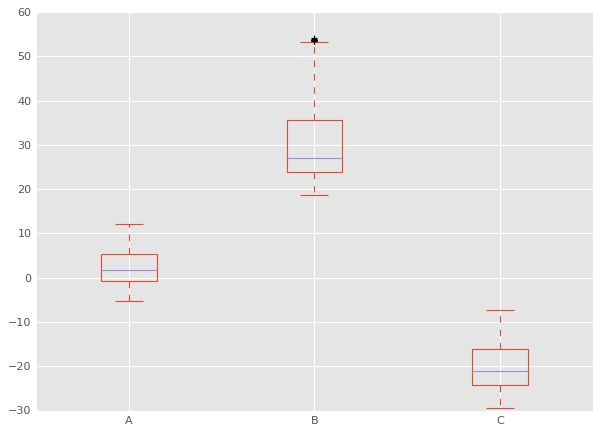

In [38]:
# Boxplots
data.plot.box();

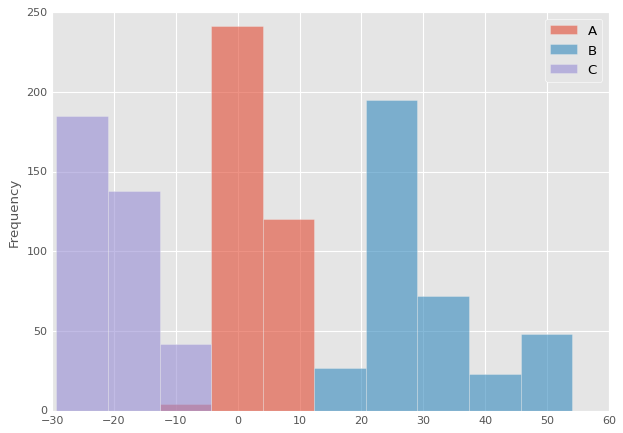

In [42]:
# Histogram
# Setting alpha level to inspect distribution overlap
data.plot.hist(alpha = 0.6);

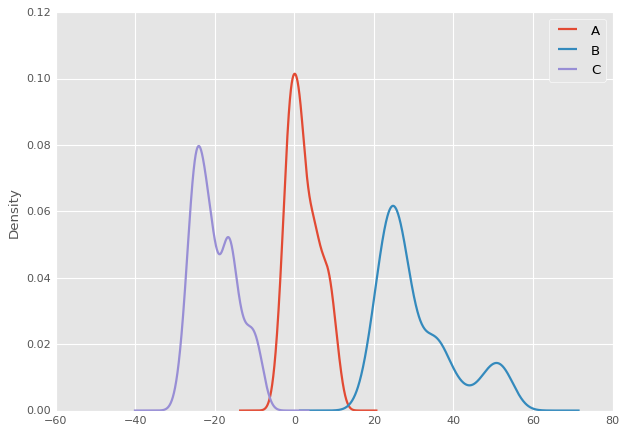

In [44]:
# Kernel Density Estimate plot
# Useful for visualizing an estimate of 
# a variable's probability density function. 
data.plot.kde();

In [46]:
iris = pd.read_csv(r'C:\Users\nrmmw\Documents\Flatiron\dsc-data-visualization-with-pandas\iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Scatter Matrix

A scatter matrix is used to compare each column with every other column in a pairwise fashion

It also shows histograms along the diagonals

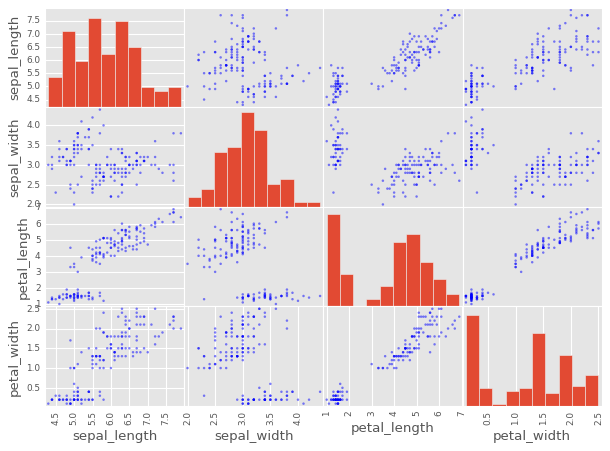

In [48]:
pd.plotting.scatter_matrix(iris);

Looking at above scatter plots generated by scatter_matrix(), it appears that there are some distinct groupings of the values which could be indicative of clustering/ grouping etc. Such handy visual analytics allow us to better decide a course of action for in-depth predictive analysis.

### Parallel Plots

Pandas includes a plotting tool for creating parallel coordinates plots which could be a great way to visualize multivariate data.

>Parallel coordinate plots are a common way of visualizing high dimensional multivariate data. Each variable in the dataset corresponds to an equally-spaced, parallel, vertical line. The values of each variable are then connected by lines between for each individual observation. 

Let's create a parallel plot for the 4 predictor variables in the iris dataset and see if we can make any further judgments about the nature of data. We will use the `pd.plotting.parellel_coordinates()` function and pass in the `iris` dataset with the response column (species) as an argument, just like we saw above. Let's also apply some customizations.

* Color the lines by class given in `'species'` column (this will allow handy inspection to see any patterns). 

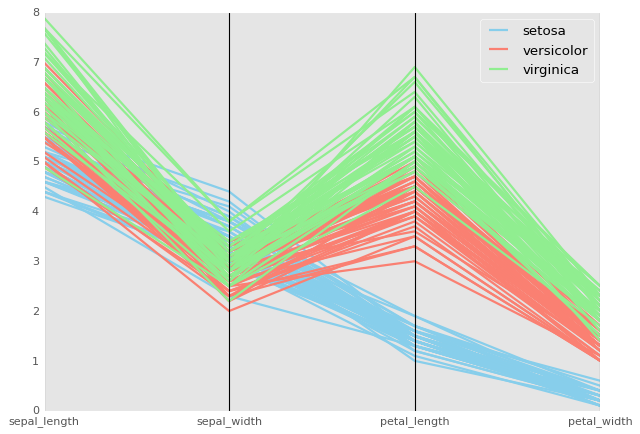

In [49]:
# Set a colormap with 3 colors to show species
colormap = ('skyblue', 'salmon', 'lightgreen')
pd.plotting.parallel_coordinates(iris, 'species', color=colormap);